In [1]:
from os import system
system("pip install wordcloud")

0

In [24]:
import gzip
import re
import csv
import json
import pandas as pd
import pandas

In [25]:
dataset = pd.read_csv('Reviews (1).csv.gz')


In [26]:
dataset.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
5,3781,63371931,2016-02-22,55456499,John-Mark,Frank was very accommodating throughout my sta...
6,3781,67909504,2016-04-01,55456499,John-Mark,Excellent! This was my second stay at the Jeff...
7,3781,97906006,2016-08-28,88528884,Elisa,Frank was a wonderful and accommodating host. ...
8,3781,105143774,2016-09-30,1342806,Nicole,"Frank was great, the apartment has everything ..."
9,3781,129692749,2017-02-01,55126634,Carlos,Very nice. Comfortable apartment. Good locatio...


In [27]:
dataset['word_count'] = dataset['comments'].apply(lambda x: len(str(x).split(" ")))
dataset[['comments','word_count']].head()

,comments,word_count
0,The apartment was as advertised and Frank was ...,20
1,It was a pleasure to stay at Frank's place. Th...,86
2,The apartment description is entirely faithful...,60
3,Thoroughly enjoyed my time at Frank's home. Ha...,66
4,Great value for the money! This location has e...,143


In [28]:
dataset.word_count.describe()

count    199330.000000
mean         47.792284
std          48.326399
min           1.000000
25%          16.000000
50%          35.000000
75%          63.000000
max         827.000000
Name: word_count, dtype: float64

In [29]:
dataset['comments']=[str(d) for d in dataset['comments']]

In [30]:
freq = pandas.Series(' '.join(dataset['comments']).split()).value_counts()[:20]
freq

and      416836
the      339282
to       278009
a        261009
was      234602
is       165510
in       154050
The      117731
for      109236
very     108366
of       105668
I        103369
with      75757
place     75256
great     70133
we        68352
stay      63117
were      51291
We        50052
you       49505
dtype: int64

In [31]:
freq1 =  pandas.Series(' '.join(dataset 
         ['comments']).split()).value_counts()[-20:]
freq1


Boylston!!         1
towels/napkins;    1
stains/hair        1
Naar               1
전망좋고               1
........           1
fendu              1
mantainance,       1
6:30am,            1
trouvant           1
respond/check      1
hill)에서            1
refined.           1
dirty).            1
alley...came       1
accomadations,     1
bellow.            1
daily),            1
w/exposed          1
standing;          1
dtype: int64

In [32]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [33]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [34]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["also", "show", "room", "would", "home", "apartment", "house", "previously", "shown","place","stay","seattle"]
stop_words = stop_words.union(new_words)

In [35]:
corpus = []
for i in range(0, 3847):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['comments'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [36]:
#View corpus item
corpus[222]

'phil fantastic host boston week work staying phil made great beginning end day phil great communicator able let know flight delayed instantly felt welcome opened front door arrived everything phil exactly described listing nice view backyard desk television comfortable bed roomy closet artwork phil procures sell amazing getting know phil understand relationship mexican artist quite interesting mostly work related purpose able spend time site seeing weekend boston phil quick suggest beaten path option local know neighborhood phil life quite nice good restaurant block direction well convenience store staple item plan cooking great overall think best part getting know phil amazingly laid back adventurous kind guy instantly make feel welcomed comfortable gladly phil message next time area grab dinner'

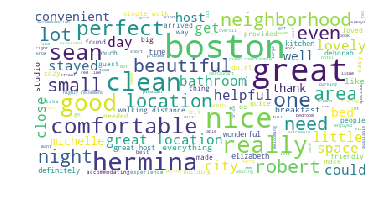

In [37]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=150,
                          max_font_size=40, 
                          random_state=4
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=2000)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [39]:
list(cv.vocabulary_.keys())[:10]

['advertised',
 'frank',
 'incredibly',
 'helpful',
 'entire',
 'process',
 'definitely',
 'recommend',
 'incredibly helpful',
 'definitely recommend']

[Text(0, 0, 'great'),
 Text(0, 0, 'boston'),
 Text(0, 0, 'location'),
 Text(0, 0, 'host'),
 Text(0, 0, 'clean'),
 Text(0, 0, 'nice'),
 Text(0, 0, 'hermina'),
 Text(0, 0, 'comfortable'),
 Text(0, 0, 'good'),
 Text(0, 0, 'time'),
 Text(0, 0, 'really'),
 Text(0, 0, 'easy'),
 Text(0, 0, 'everything'),
 Text(0, 0, 'close'),
 Text(0, 0, 'well'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'sean'),
 Text(0, 0, 'perfect'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'get')]

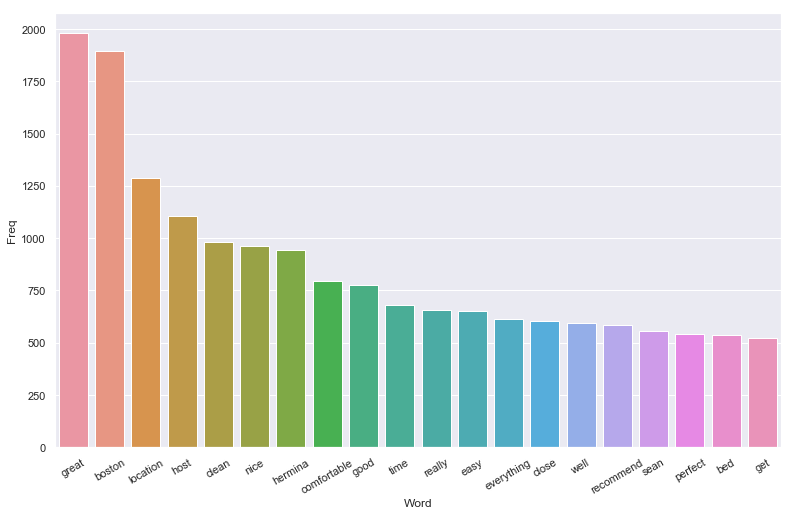

In [40]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)


                  Bi-gram  Freq
0          great location   277
1              great host   220
2        walking distance   186
3             minute walk   176
4        highly recommend   172
5       clean comfortable   114
6                red line   109
7          location great   104
8       everything needed    99
9            visit boston    95
10   definitely recommend    94
11        downtown boston    92
12  public transportation    92
13        bed comfortable    91
14               easy get    90
15              come back    87
16            easy access    87
17               back bay    86
18         wonderful host    82
19            time boston    81


[Text(0, 0, 'great location'),
 Text(0, 0, 'great host'),
 Text(0, 0, 'walking distance'),
 Text(0, 0, 'minute walk'),
 Text(0, 0, 'highly recommend'),
 Text(0, 0, 'clean comfortable'),
 Text(0, 0, 'red line'),
 Text(0, 0, 'location great'),
 Text(0, 0, 'everything needed'),
 Text(0, 0, 'visit boston'),
 Text(0, 0, 'definitely recommend'),
 Text(0, 0, 'downtown boston'),
 Text(0, 0, 'public transportation'),
 Text(0, 0, 'bed comfortable'),
 Text(0, 0, 'easy get'),
 Text(0, 0, 'come back'),
 Text(0, 0, 'easy access'),
 Text(0, 0, 'back bay'),
 Text(0, 0, 'wonderful host'),
 Text(0, 0, 'time boston')]

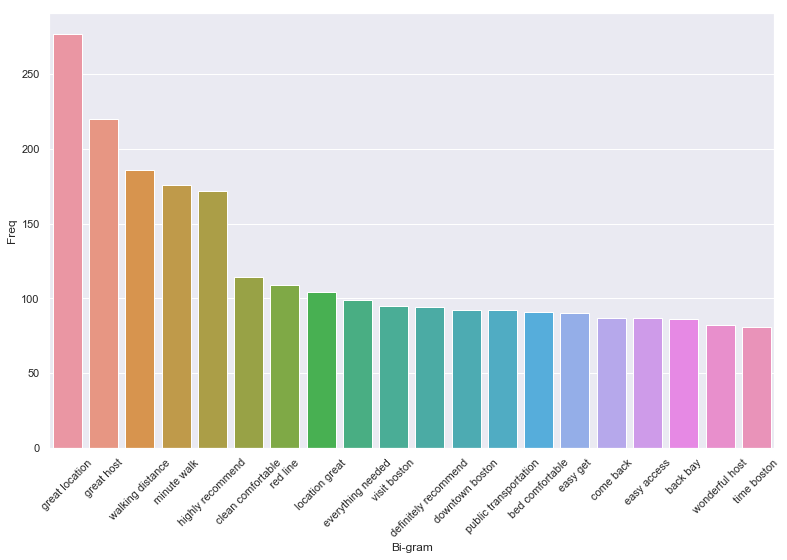

In [41]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                       Tri-gram  Freq
0       within walking distance    77
1         day arrival automated    36
2     arrival automated posting    36
3         website hidden airbnb    32
4            hermina great host    31
5            cozy corner boston    31
6      highly recommend staying    30
7       first airbnb experience    27
8          definitely come back    27
9              next time boston    26
10    host canceled reservation    26
11     canceled reservation day    25
12      reservation day arrival    25
13            robert great host    25
14               close red line    22
15              http www airbnb    21
16               www airbnb com    21
17              airbnb com room    21
18          michelle great host    21
19  close public transportation    20


[Text(0, 0, 'within walking distance'),
 Text(0, 0, 'day arrival automated'),
 Text(0, 0, 'arrival automated posting'),
 Text(0, 0, 'website hidden airbnb'),
 Text(0, 0, 'hermina great host'),
 Text(0, 0, 'cozy corner boston'),
 Text(0, 0, 'highly recommend staying'),
 Text(0, 0, 'first airbnb experience'),
 Text(0, 0, 'definitely come back'),
 Text(0, 0, 'next time boston'),
 Text(0, 0, 'host canceled reservation'),
 Text(0, 0, 'canceled reservation day'),
 Text(0, 0, 'reservation day arrival'),
 Text(0, 0, 'robert great host'),
 Text(0, 0, 'close red line'),
 Text(0, 0, 'http www airbnb'),
 Text(0, 0, 'www airbnb com'),
 Text(0, 0, 'airbnb com room'),
 Text(0, 0, 'michelle great host'),
 Text(0, 0, 'close public transportation')]

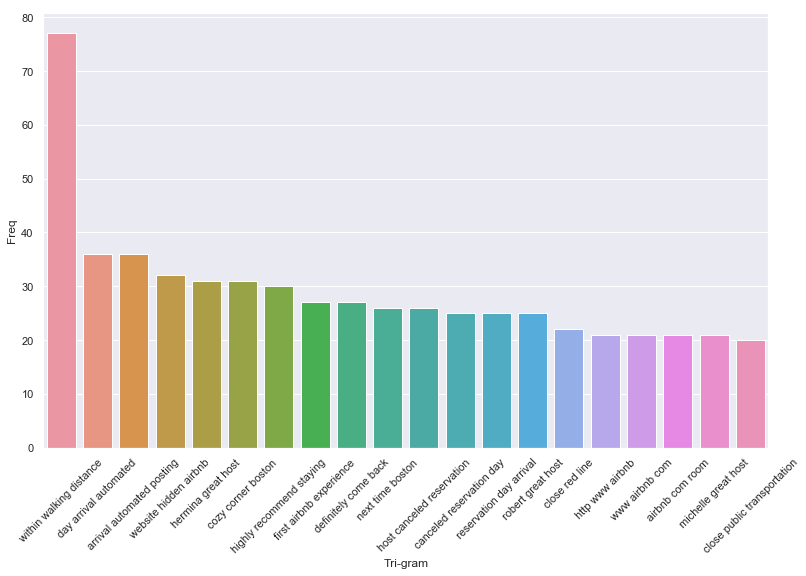

In [42]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


                                      Tri-gram  Freq
0                day arrival automated posting    36
1                host canceled reservation day    25
2             canceled reservation day arrival    25
3        host canceled reservation day arrival    25
4                          http www airbnb com    21
5                          www airbnb com room    21
6                     http www airbnb com room    21
7            reservation day arrival automated    20
8   canceled reservation day arrival automated    20
9    reservation day arrival automated posting    20
10            reservation canceled day arrival    16
11              canceled day arrival automated    16
12  reservation canceled day arrival automated    16
13      canceled day arrival automated posting    16
14                        airbnb com room http    13
15                           com room http www    13
16                        room http www airbnb    13
17                    www airbnb com room http

[Text(0, 0, 'day arrival automated posting'),
 Text(0, 0, 'host canceled reservation day'),
 Text(0, 0, 'canceled reservation day arrival'),
 Text(0, 0, 'host canceled reservation day arrival'),
 Text(0, 0, 'http www airbnb com'),
 Text(0, 0, 'www airbnb com room'),
 Text(0, 0, 'http www airbnb com room'),
 Text(0, 0, 'reservation day arrival automated'),
 Text(0, 0, 'canceled reservation day arrival automated'),
 Text(0, 0, 'reservation day arrival automated posting'),
 Text(0, 0, 'reservation canceled day arrival'),
 Text(0, 0, 'canceled day arrival automated'),
 Text(0, 0, 'reservation canceled day arrival automated'),
 Text(0, 0, 'canceled day arrival automated posting'),
 Text(0, 0, 'airbnb com room http'),
 Text(0, 0, 'com room http www'),
 Text(0, 0, 'room http www airbnb'),
 Text(0, 0, 'www airbnb com room http'),
 Text(0, 0, 'airbnb com room http www'),
 Text(0, 0, 'com room http www airbnb')]

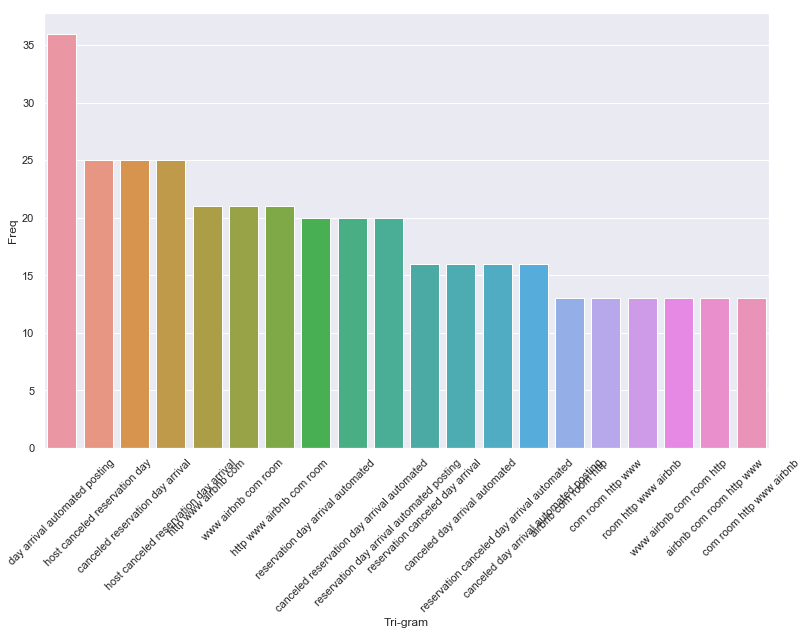

In [43]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(4,5), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvf = TfidfVectorizer(stop_words=stopwords.words('english'))
X_text = tvf.fit_transform(corpus)


In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 


In [46]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
# fetch document for which keywords needs to be extracted
word_net=dict()


In [47]:
tf_idf_vector

NameError: name 'tf_idf_vector' is not defined

In [ ]:
for doc in corpus:  
    

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,5)

    # now print the results
  
    for k in keywords:
        if k not in word_net:
            word_net[k]=keywords[k]
        else:
            word_net[k]=word_net[k]+keywords[k]
            
for k in sorted(word_net):
    print(k,word_net[k])